## Function Transformer

### ❓ How to find if data is normal
QQ Plot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scipy.stats as stats

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv("train.csv", usecols= ['Survived', 'Age', 'Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [10]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\premk\AppData\Local\Temp\ipykernel_22836\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [12]:
X = df.iloc[:, 1:3]
y = df.iloc[:, 0]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\premk\AppData\Local\Temp\ipykernel_22836\3308972892.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


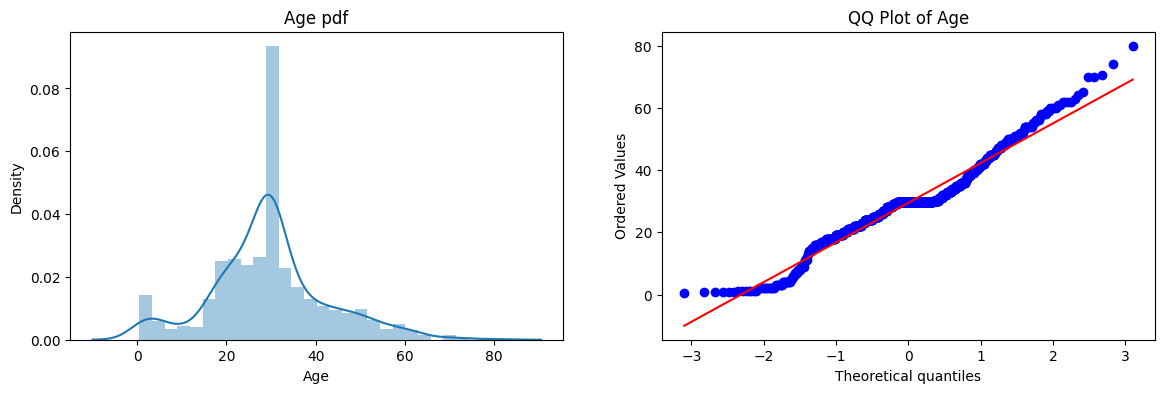

In [16]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.distplot(X_train['Age'])
plt.title("Age pdf")

plt.subplot(1, 2, 2)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title("QQ Plot of Age")

plt.show()

C:\Users\premk\AppData\Local\Temp\ipykernel_22836\1674041520.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


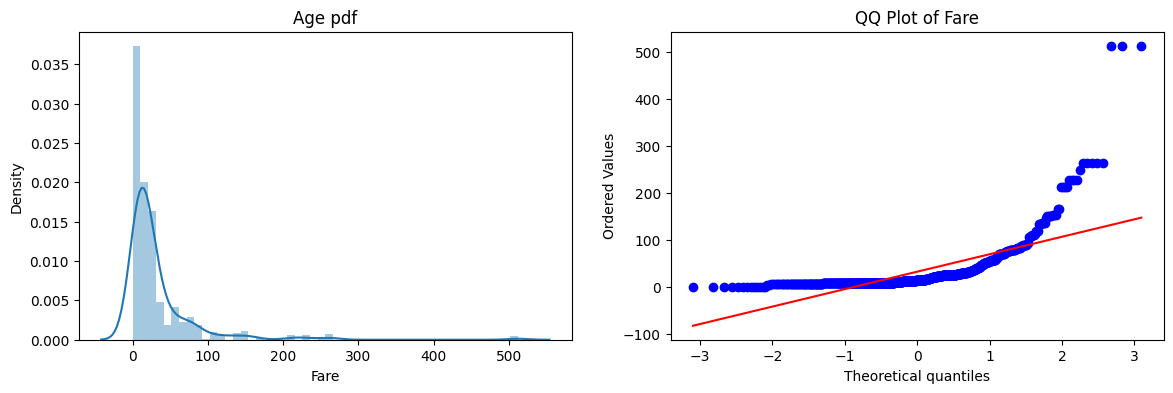

In [17]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.distplot(X_train['Fare'])
plt.title('Age pdf')

plt.subplot(1, 2, 2)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title("QQ Plot of Fare")

plt.show()

In [19]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [20]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred2))

Logistic Regression Accuracy: 0.6480446927374302
Decision Tree Accuracy: 0.6759776536312849


In [ ]:
# now use function transformer
trf = FunctionTransformer(np.log1p, validate=True) 
# here we use log1p to handle zero values in Fare, if there is no zero value, you can use np.log

In [22]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [24]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [25]:
clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

print("Logistic Regression Accuracy after transformation:", accuracy_score(y_test, y_pred))
print("Decision Tree Accuracy after transformation:", accuracy_score(y_test, y_pred2))

Logistic Regression Accuracy after transformation: 0.6815642458100558
Decision Tree Accuracy after transformation: 0.6815642458100558


In [26]:
# now we are applying cv
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6666791510611736


In [32]:
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=X_train.columns)

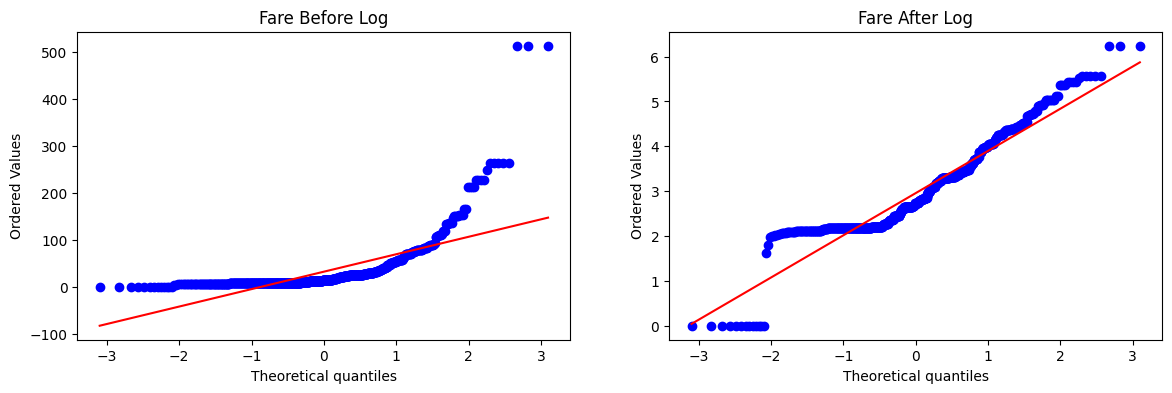

In [33]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed_df['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

Text(0.5, 1.0, 'Age After Log')

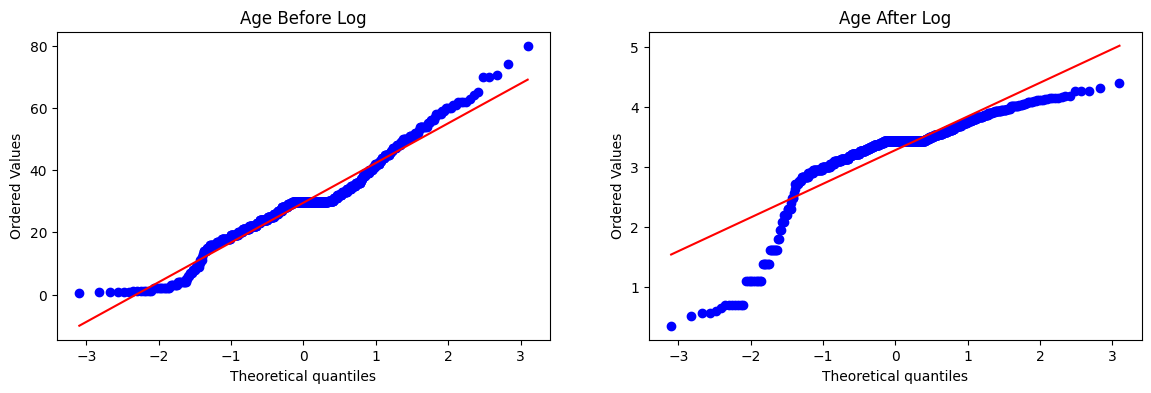

In [35]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed_df['Age'], dist="norm", plot=plt)
plt.title('Age After Log')


In [ ]:
# here we can see that after applying log transformation, the distribution of Fare and Age is more normal
# but the distribution of Age is still not perfect, we can try other transformations like Box-Cox or Yeo-Johnson if needed